# Handwritten Character Recognition - Data Loading and Exploration

This notebook focuses on loading the handwritten character dataset and performing initial inspection and visualization to understand the data before preprocessing and modeling.

Objective:
- Load handwritten character dataset
- Inspect structure and labels
- Visualize sample images
- Understand data distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
print("Downloading EMNIST Balanced dataset...")
X, y = fetch_openml('EMNIST_balanced', version=1, return_X_y=True, as_frame=False)

print("Dataset loaded successfully.")

Dataset loaded successfully.


Let's check the size of images in dataset and unique classes in dataset.

In [26]:
print("Images shape:", X.shape)
print("Labels shape:", y.shape)
print("Unique classes:", np.unique(y.astype(int)))
print("Number of classes:", len(np.unique(y)))

Images shape: (131600, 784)
Labels shape: (131600,)
Unique classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Number of classes: 47


Let us visualise one of the image from the dataset.

In [13]:
def fix_emnist(img):
    img = img.reshape(28,28)
    img = np.fliplr(img)
    img = np.rot90(img)
    return img

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

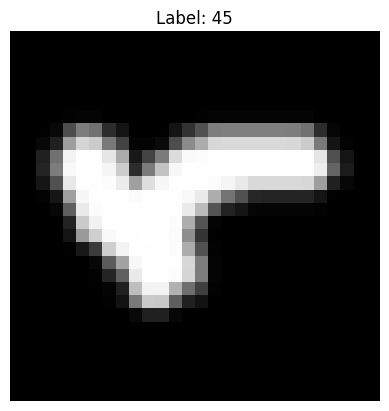

In [14]:
plt.imshow(fix_emnist(X[0]), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis("off")

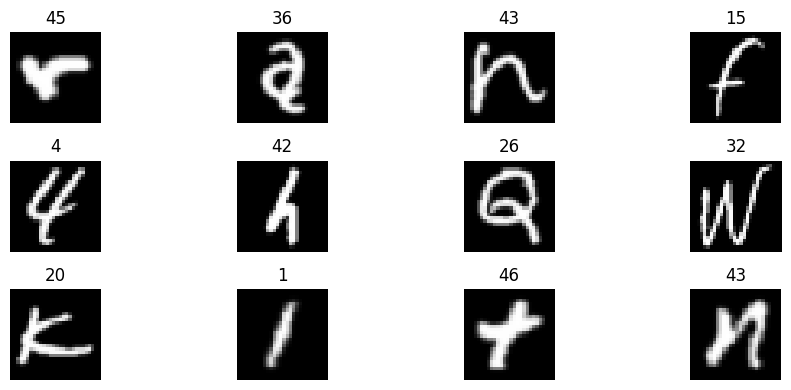

In [15]:
plt.figure(figsize=(10,4))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(fix_emnist(X[i]), cmap='gray')
    plt.title(y[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

lets create human readable mappings for the classes.

In [16]:
# Sequential list of EMNIST Balanced class names as per the EMNIST dataset official documentation.
class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',                # 0-9
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', # 10-22
    'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', # 23-35
    'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't'            # 36-46 (distinct lowercase)
]

emnist_label_map = {i: char for i, char in enumerate(class_names)}
emnist_label_map

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [17]:
import json

with open("../../ml/datasets/emnist_label_map.json", "w") as f:
    json.dump(emnist_label_map, f)

print("Mapping saved locally.")

Mapping saved locally.


Now we will visualise one image from each class.

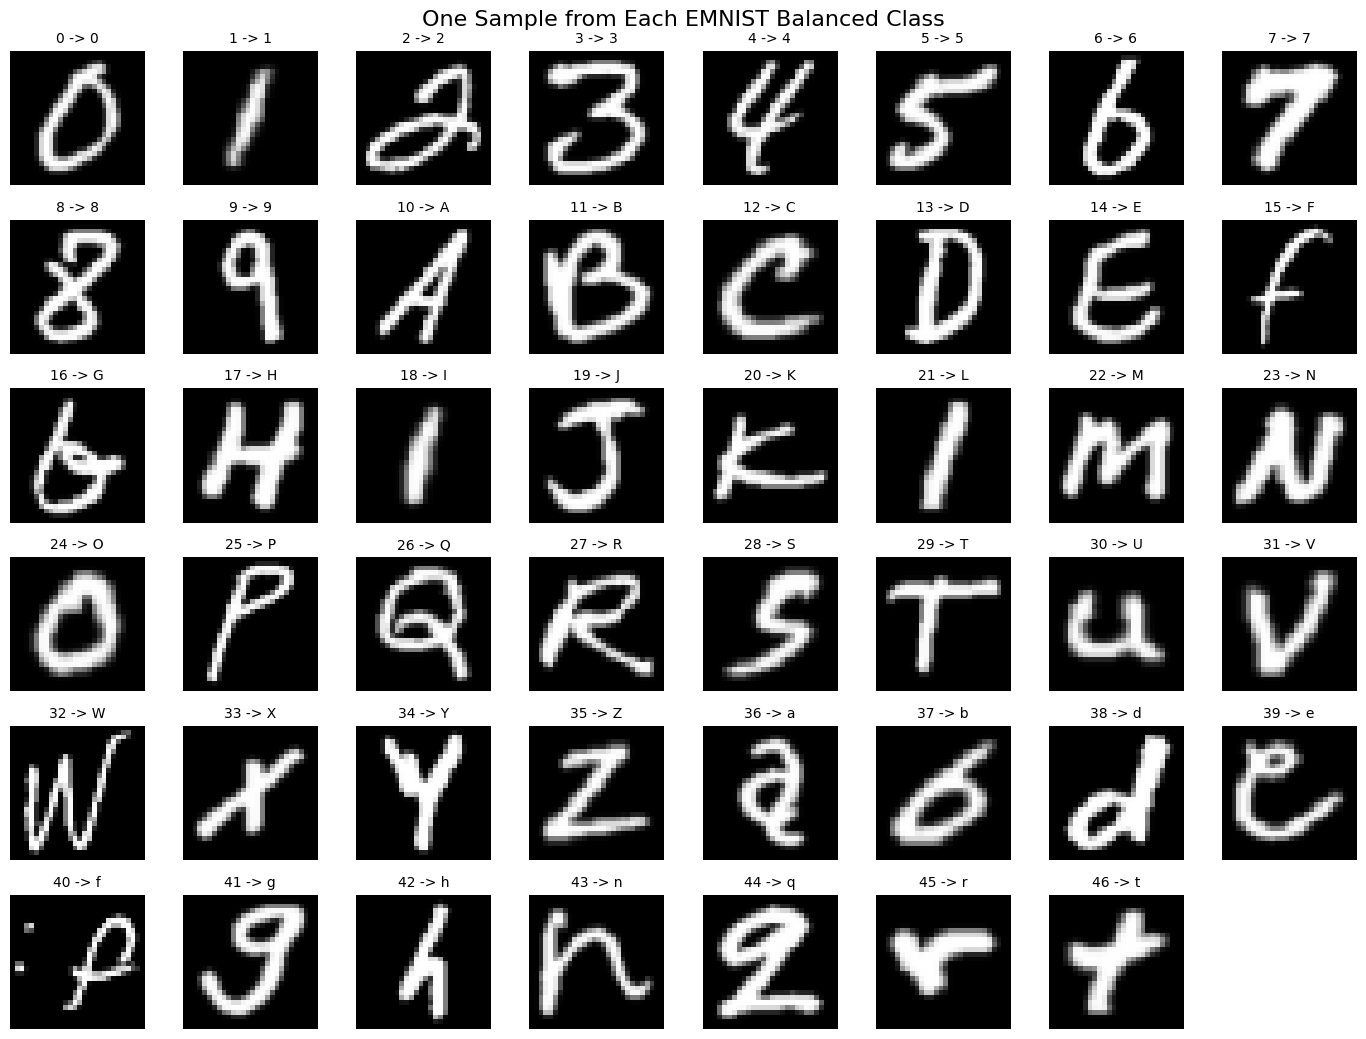

In [28]:
y_int = y.astype(int)
unique_classes = np.unique(y_int)

plt.figure(figsize=(14, 14))

for i, cls in enumerate(unique_classes):
    idx_list = np.where(y_int == cls)[0]
    
    if len(idx_list) > 0:
        idx = idx_list[0]
        
        plt.subplot(8, 8, i + 1)
        plt.imshow(fix_emnist(X[idx]), cmap="gray")
        
        char_name = emnist_label_map.get(cls, "Unknown")
        plt.title(f"{cls} -> {char_name}", fontsize=10)
        plt.axis("off")

plt.suptitle("One Sample from Each EMNIST Balanced Class", fontsize=16)
plt.tight_layout()
plt.show()

Lets visualize how all the data is distributed among classes.

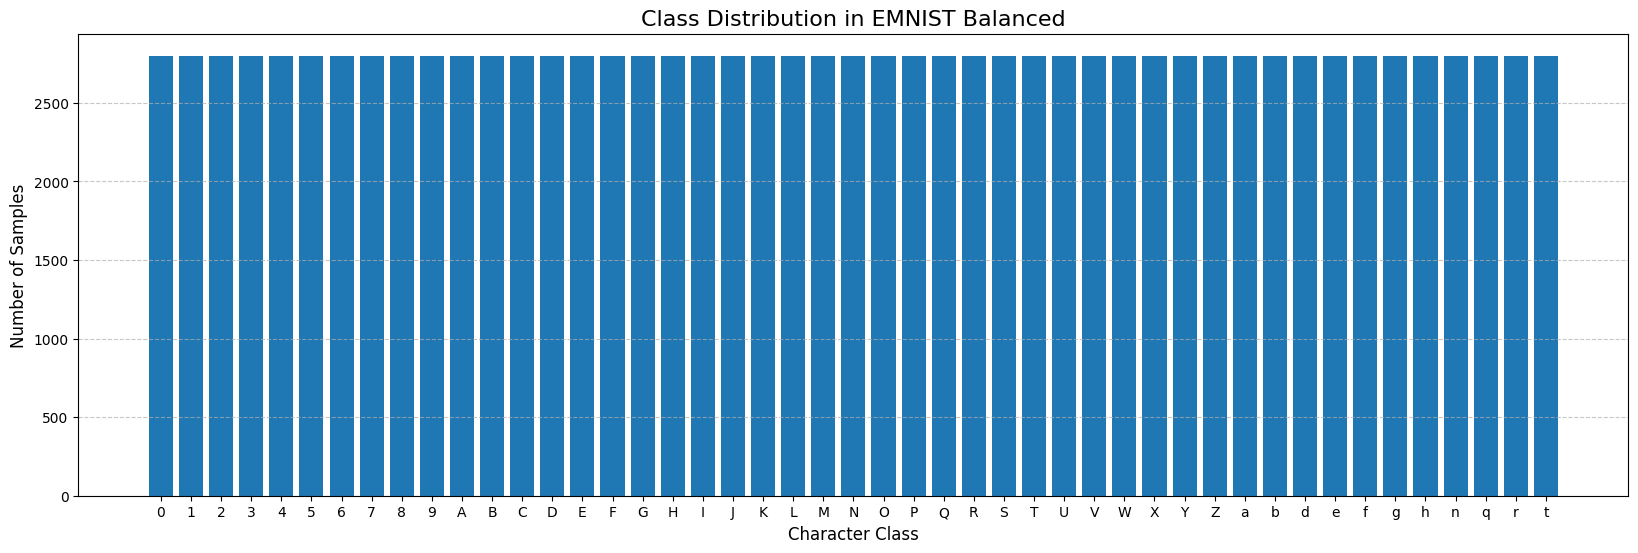

In [35]:
classes_int, counts = np.unique(y.astype(int), return_counts=True)

class_chars = [emnist_label_map[c] for c in classes_int]

plt.figure(figsize=(20, 6))

plt.bar(classes_int, counts)
plt.xticks(classes_int, class_chars)
plt.title("Class Distribution in EMNIST Balanced", fontsize=16)
plt.xlabel("Character Class", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Initial Observations:

- The dataset contains 1,31,600 handwritten digits and characters from the EMNIST Balanced dataset.
- Each image is 28x28 grayscale pixels flattened into a 784-length vector.
- The dataset includes multiple classes consisting of digits and letters.
- Class distribution is relatively balanced across categories.
- Images show large variations in writing style, rotation, and stroke patterns.

This makes EMNIST more challenging and realistic than MNIST and suitable for robust handwritten character recognition systems.
